# Data preprocessing in pandas

pandas.**DataFrame** reference:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

### 1. Import necessary packages

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Download Adult dataset
Follow the link and download the Adult dataset:  
https://archive.ics.uci.edu/ml/datasets/Adult

Next, load it from file into pandas.**DataFrame**. Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

*Hint*: look carefully at the raw data, especially at the delimiters. Inspect pandas.**read_csv** options and find out how to handle this.

In [2]:
DATA_DIR = 'data'
FILE_NAME = '../datasets/adult.data.csv'
EXPORT_FILE_NAME = '../datasets/adult.data.processed.csv'

file_path = os.path.join(DATA_DIR, FILE_NAME)

In [3]:
df = pd.read_csv(FILE_NAME)

### 3. Set DataFrame column labels
Dataset description:  
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html

In [4]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

### 4. Get DataFrame dimensions
DataFrame dimensions are numbers of records and attributes. See docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

In [5]:
df.shape

(32560, 15)

### 5. Print out first and last 5 rows of the DataFrame
See docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### 6. Inspect data types of DataFrame columns
Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

### 7. Get numbers of unique values in each column
Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [9]:
df.nunique()

age                  73
workclass             9
fnlwgt            21647
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
class                 2
dtype: int64

Now, print out all unique values for attribute `'marital-status'`. Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html

In [10]:
df['marital-status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

### 8. Group attributes by data types

In [11]:
numeric_fields = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
binary_fields = ['class']
ordinal_fields = ['education', 'education-num']
nominal_fields = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

### 9. Count null values in each column
Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

### 10. Implement functions for counting absolute and relative frequencies of values

In [13]:
def make_abs_freq_dict(df, column):
    return df.groupby(column).size()


def make_rel_freq_dict(df, column):
    return df.groupby(column).size() / len(df[column])

### 11. Print out absolute value frequencies for binary fields

In [14]:
for field in binary_fields:
    print(make_abs_freq_dict(df, field))

class
 <=50K    24719
 >50K      7841
dtype: int64


### 12. Print out absolute value frequencies for nominal fields

In [15]:
for field in nominal_fields:
    print(make_abs_freq_dict(df, field))

workclass
 ?                    1836
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1297
 Without-pay            14
dtype: int64
marital-status
 Divorced                  4443
 Married-AF-spouse           23
 Married-civ-spouse       14976
 Married-spouse-absent      418
 Never-married            10682
 Separated                 1025
 Widowed                    993
dtype: int64
occupation
 ?                    1843
 Adm-clerical         3769
 Armed-Forces            9
 Craft-repair         4099
 Exec-managerial      4066
 Farming-fishing       994
 Handlers-cleaners    1370
 Machine-op-inspct    2002
 Other-service        3295
 Priv-house-serv       149
 Prof-specialty       4140
 Protective-serv       649
 Sales                3650
 Tech-support          928
 Transport-moving     1597
dtype: int64
relationship
 Husband           13193
 Not-in-family 

### 13. Find out what columns have missing values
*Hint*: see dataset description once again:  
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [16]:
df.isin([' ?']).max()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
class             False
dtype: bool

### 14. Fill missing values
Remember, that the most popular value is used to fill missing values of nominal fields.

See docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

In [17]:
df = df.replace(' ?', df[nominal_fields].mode())

### 15. Plot values frequencies for all continuous and categorical fields
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html  
https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib

#### 15.1 Age

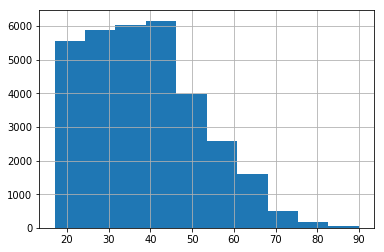

In [18]:
df['age'].hist()

#### 15.2 Workclass

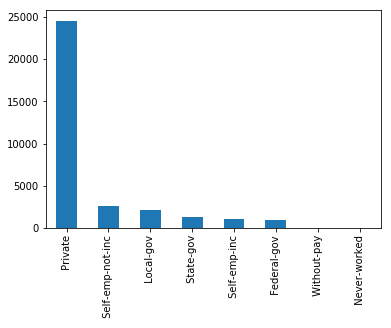

In [19]:
df['workclass'].value_counts().plot(kind='bar')

#### 15.4 Final weight

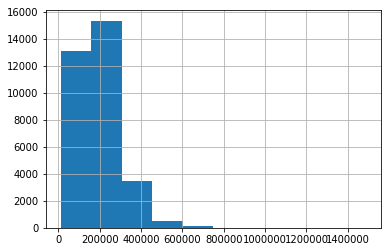

In [20]:
df['fnlwgt'].hist()

#### 15.5 Education

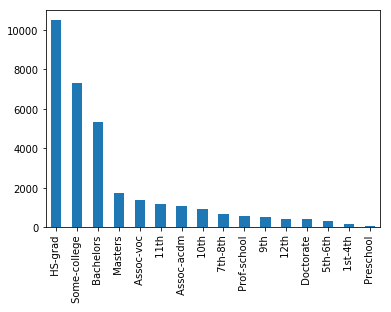

In [21]:
df['education'].value_counts().plot(kind='bar')

#### 15.6 Marital status

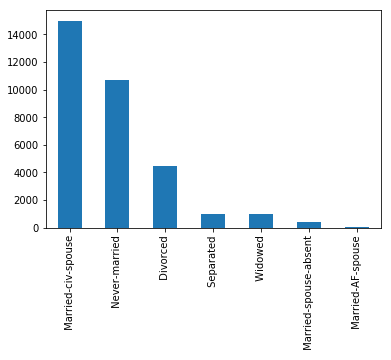

In [22]:
df['marital-status'].value_counts().plot(kind='bar')

#### 15.7 Occupation

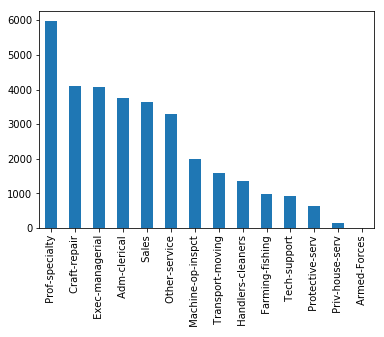

In [23]:
df['occupation'].value_counts().plot(kind='bar')

#### 15.8 Relationship

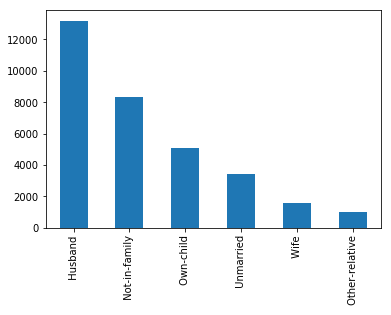

In [24]:
df['relationship'].value_counts().plot(kind='bar')

#### 15.9 Race

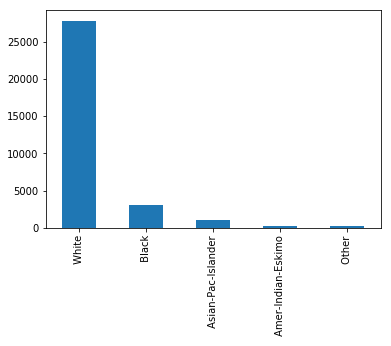

In [25]:
df['race'].value_counts().plot(kind='bar')

#### 15.10 Sex

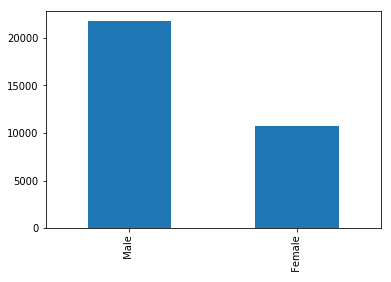

In [26]:
df['sex'].value_counts().plot(kind='bar')

#### 15.11 Capital gain

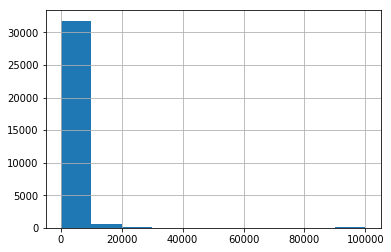

In [27]:
df['capital-gain'].hist()

#### 15.12 Capital loss

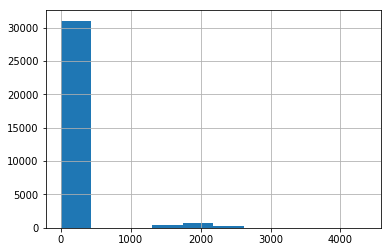

In [28]:
df['capital-loss'].hist()

#### 15.13 Hours per week

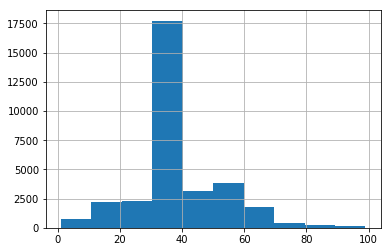

In [29]:
df['hours-per-week'].hist()

#### 15.14.1 Native country (Top 5)

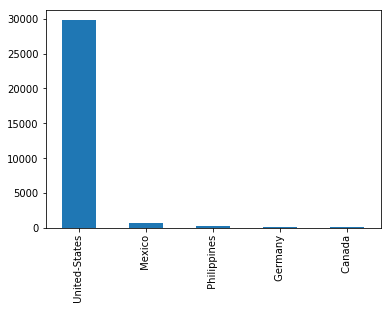

In [30]:
df['native-country'].value_counts()[:5].plot(kind='bar')

#### 15.14.2 Native country (Excluding Top 1)

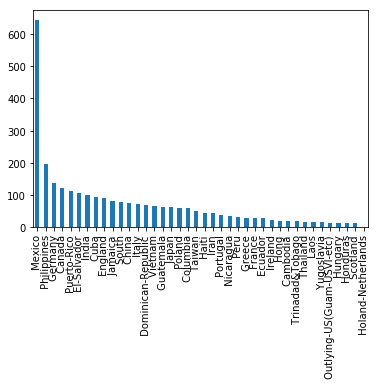

In [31]:
df['native-country'].value_counts()[1:].plot(kind='bar')

#### 15.15 Class

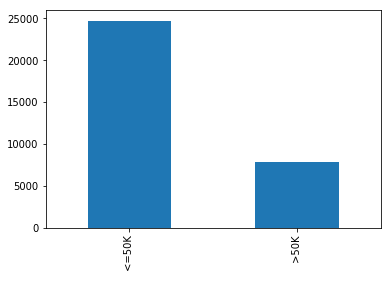

In [32]:
df['class'].value_counts().plot(kind='bar')

### 16. Merge rare values of nominal fields
Let's call values ***rare***, if their relative frequency is **under 1%**. Merge rare values into one. Let's call this value `'OTHER'`. Note that if there is only one rare value, merging is useless. If there are only few rare values, merging does not give much advantage. 

In [33]:
for field in nominal_fields:
    rare = [k for k, v in make_rel_freq_dict(df, field).items() if v < 0.01]
    if len(rare) > 1:
        df[field] = df[field].replace(rare, 'Other')

### 17. Inspect dependent fields
Look at the fields `'education'` and `'education-number'`. Make `set` of all observed pairs and see whether these fields are dependent. If so, be sure to drop one of them.

Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [34]:
if 'education' in df:
    pairs = df[['education', 'education-num']].groupby(['education', 'education-num']).count()
    if len(df['education'].unique()) == len(pairs):
        df = df.drop('education', axis=1)
        ordinal_fields.remove('education')

### 18. Scale continuous and ordinal fields
Remember, that standardization is used for continuous values, and normalization - for ordinal ones.  

The following docs may appear useful:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html

#### 18.1 Standardization

In [35]:
df[numeric_fields] = (df[numeric_fields] - df[numeric_fields].mean()) \
    / df[numeric_fields].std()

#### 18.2 Normalization

In [36]:
df[ordinal_fields] = (df[ordinal_fields] - df[ordinal_fields].min()) \
    / (df[ordinal_fields].max() - df[ordinal_fields].min())

### 19. Validate scaling
*Hint*: normalized values must be in range \[0, 1\], but standardized ones must have mean equal to 0 and standard deviation equal to 1.

#### 19.1 Normalized values range

In [37]:
print('[', min(df[ordinal_fields].min()), ', ', max(df[ordinal_fields].max()), ']')

[ 0.0 ,  1.0 ]


#### 19.2.1 Standardized values means

In [38]:
df[numeric_fields].mean()

age               1.029684e-16
fnlwgt           -9.705586e-17
capital-gain     -1.535763e-17
capital-loss      3.463020e-16
hours-per-week   -1.719443e-16
dtype: float64

#### 19.2.2 Standardized values standard deviations

In [39]:
df[numeric_fields].std()

age               1.0
fnlwgt            1.0
capital-gain      1.0
capital-loss      1.0
hours-per-week    1.0
dtype: float64

### 20. Make dummy variables for binary and nominal fields
See docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [40]:
df = pd.concat([df, pd.get_dummies(df[binary_fields + nominal_fields])], axis=1)

### 21. Binarize target variable

In [41]:
df.to_csv(EXPORT_FILE_NAME)